In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
9,pretrained,decision_tree,Transformer,depth=4,-1,-1,20,12,8,decision_tree_pretrained
1,pretrained,linear_regression,Transformer,,-1,-1,20,12,8,linear_regression_pretrained
0,toy_ori,linear_regression,Transformer,,-1,-1,5,12,8,linear_regression_toy
2,toy_no_posi,linear_regression,Transformer,,-1,-1,5,12,8,linear_regression_toy
3,toy_4_posi,linear_regression,Transformer,,-1,-1,5,12,8,linear_regression_toy
7,pretrained,relu_2nn_regression,Transformer,hidden_layer_size=100,-1,-1,20,12,8,relu_2nn_regression_pretrained
4,step_5000,single_layer,single_layer,,-1,-1,20,1,1,single_layer
5,ee787f97-93f6-4cc7-9d7c-c69e5287eaf4,single_layer,single_layer,,-1,-1,20,1,1,single_layer
6,54ad81a7-ee46-4abe-b057-e9113d567f20,single_layer,single_layer,,-1,-1,20,1,1,single_layer
8,pretrained,sparse_linear_regression,Transformer,sparsity=3,-1,-1,20,12,8,sparse_regression_pretrained


In [3]:
task = "linear_regression"
#task = "sparse_linear_regression"
# task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "toy_ori"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

run_name: linear_regression_toy, id: toy_ori
------------------------
conf: Munch({'config': 'conf/toy.yaml', 'inherit': ['/home/hlv8980/in-context-learning-fork/src/conf/models/standard.yaml', '/home/hlv8980/in-context-learning-fork/src/conf/wandb.yaml'], 'model': Munch({'family': 'gpt2', 'n_dims': 5, 'n_embd': 256, 'n_head': 8, 'n_layer': 12, 'n_positions': 11}), 'out_dir': '../models/linear_regression/fb64129b-0a9d-4b9b-9c54-c7eafb393c4e', 'test_run': False, 'training': Munch({'batch_size': 64, 'curriculum': Munch({'dims': Munch({'end': 5, 'inc': 1, 'interval': 2000, 'start': 5}), 'points': Munch({'end': 11, 'inc': 2, 'interval': 2000, 'start': 11})}), 'data': 'gaussian', 'keep_every_steps': 100000, 'learning_rate': 0.0001, 'num_tasks': None, 'num_training_examples': None, 'resume_id': None, 'save_every_steps': 1000, 'task': 'linear_regression', 'task_kwargs': Munch({}), 'train_steps': 5001}), 'wandb': Munch({'entity': 'northwestern-in-context-learning', 'log_every_steps': 100, 'nam

100%|██████████| 15/15 [00:00<00:00, 195995.51it/s]

------------------------
metrics: {'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [15.491633415222168, 5.679940223693848, 3.8030052185058594, 2.764869213104248, 1.7984416484832764, 1.3142063617706299, 0.9535486102104187, 0.6872597336769104, 0.5969556570053101, 0.5174970626831055, 0.4352850317955017], 'std': [22.197223663330078, 10.274234771728516, 7.289435386657715, 6.0985798835754395, 4.919659614562988, 2.790369749069214, 2.1854140758514404, 1.6038466691970825, 1.958783745765686, 1.383758544921875, 1.2943331003189087], 'bootstrap_low': [14.489015579223633, 5.211450576782227, 3.4898250102996826, 2.4813637733459473, 1.5922296047210693, 1.1827337741851807, 0.8575872182846069, 0.6143683195114136, 0.5091753005981445, 0.45839977264404297, 0.37850093841552734], 'bootstrap_high': [16.547697067260742, 6.122281074523926, 4.10844087600708, 3.057541847229004, 2.0505573749542236, 1.4453611373901367, 1.059004545211792, 0.763644814491272, 0.6909310221672058, 0.5832080245018005, 0.49774733185

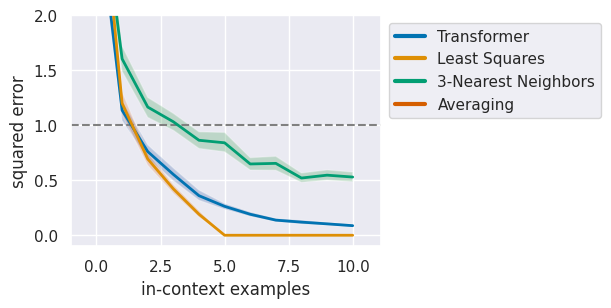

In [4]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


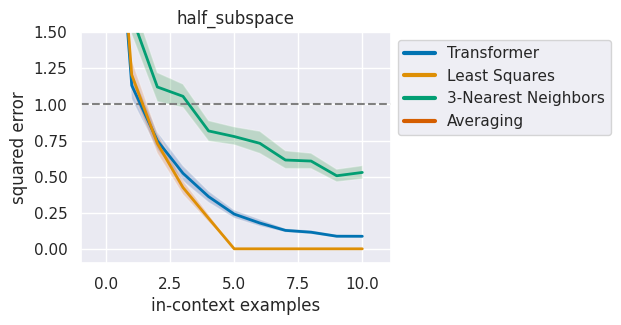

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


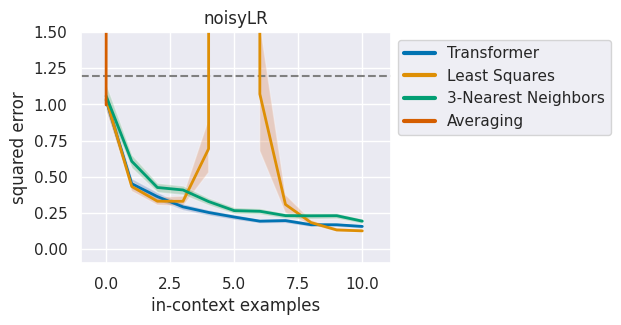

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


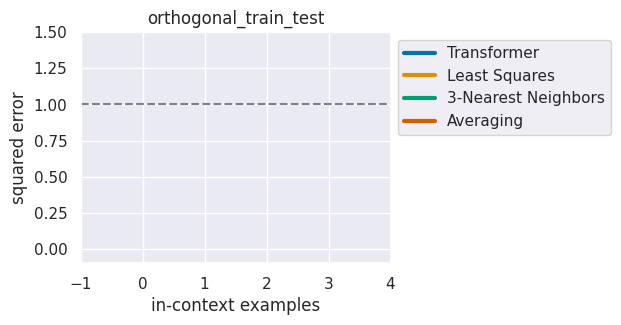

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


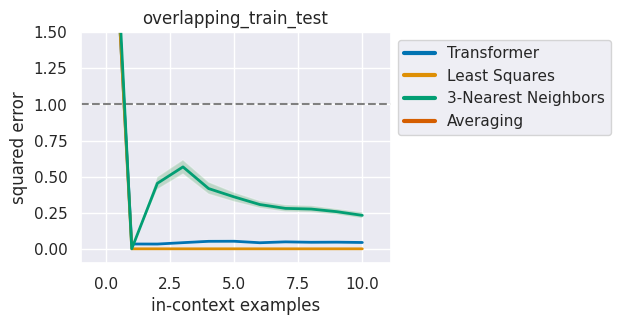

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


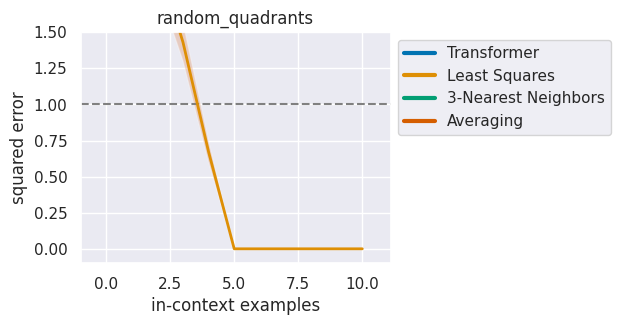

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


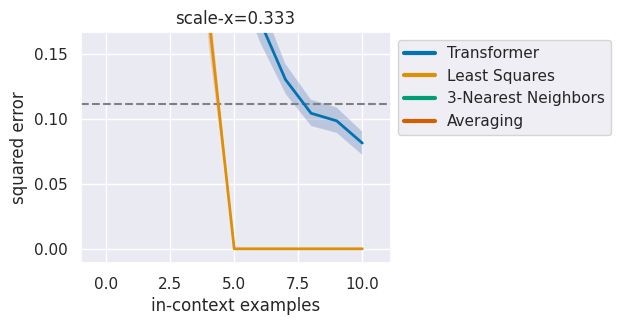

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


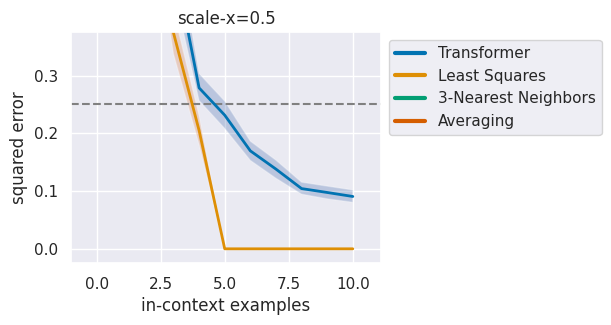

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


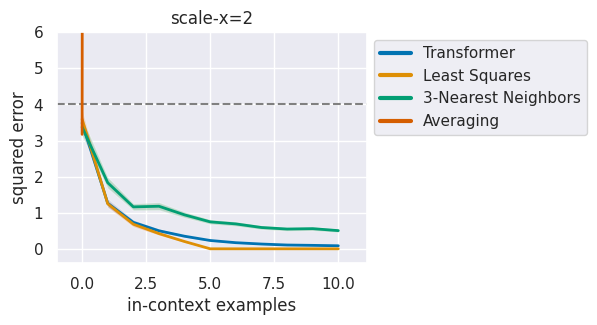

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


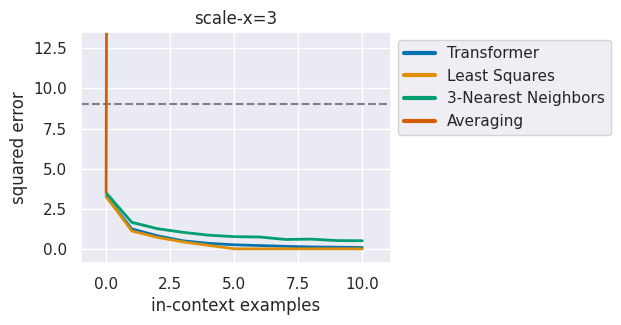

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


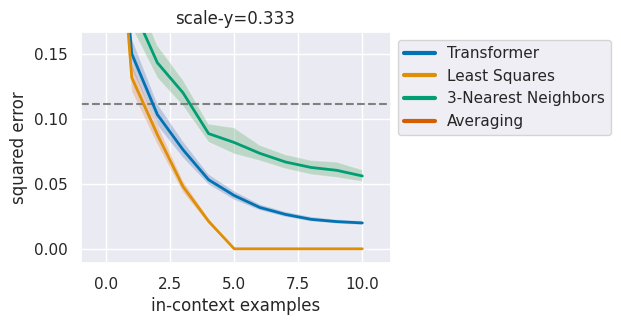

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


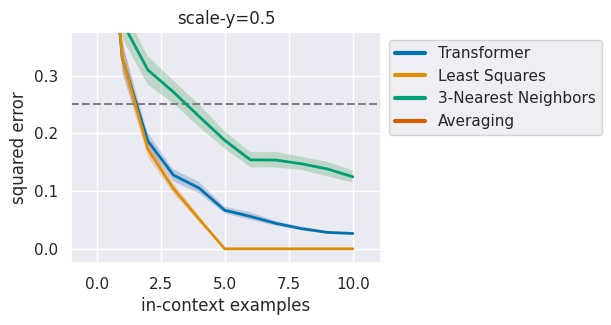

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


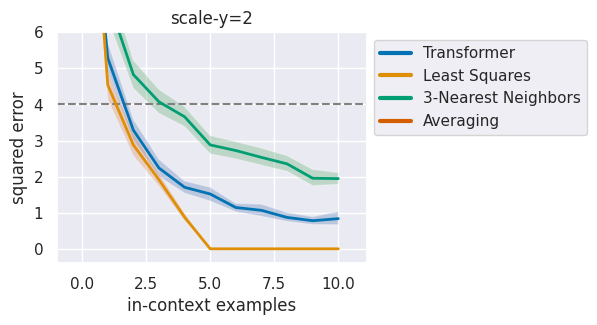

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


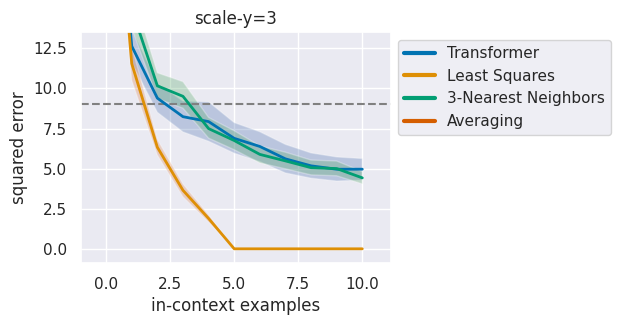

basic_plot: ['Transformer', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


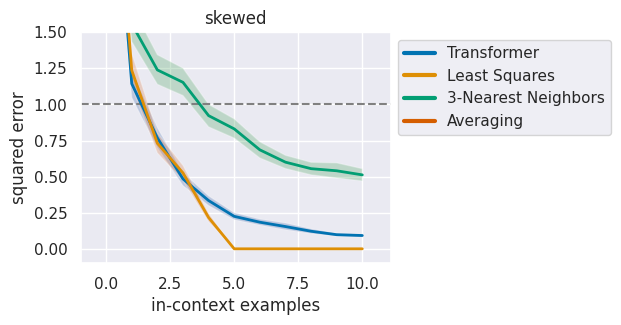

In [5]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

RuntimeError: Error(s) in loading state_dict for TransformerModel:
	size mismatch for _backbone.wpe.weight: copying a param with shape torch.Size([22, 256]) from checkpoint, the shape in current model is torch.Size([44, 256]).
	size mismatch for _backbone.h.0.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.1.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.2.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.3.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.4.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.5.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.6.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.7.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.8.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.9.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.10.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).
	size mismatch for _backbone.h.11.attn.bias: copying a param with shape torch.Size([1, 1, 22, 22]) from checkpoint, the shape in current model is torch.Size([1, 1, 44, 44]).

In [ ]:
print(conf.training.curriculum.points.end)

11


In [ ]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=21)
ys = task.evaluate(xs)

In [ ]:
with torch.no_grad():
    pred = model(xs, ys)

IndexError: index out of range in self

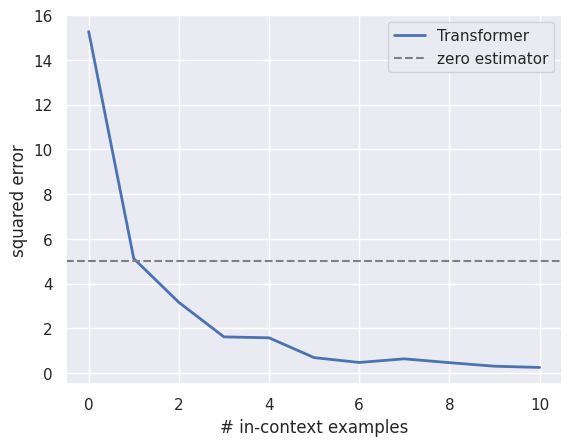

In [ ]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [ ]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

NameError: name 'xs' is not defined

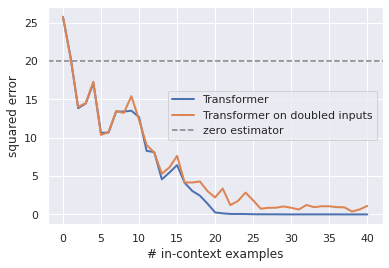

In [ ]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.